# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
import pandas_datareader
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Read and clean data

Relevant data is imported through an API from Statistikbanken.dk

In [3]:
# Importing relevant statistics from Statistikbanken.dk
ind = DstApi('NAN1')

# Displaying messy data
tabsum = ind.tablesummary(language='en')

for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))

Table NAN1: Demand and supply by transaction, price unit and time
Last update: 2024-03-27T08:00:00
TRANSAKT:


,id,text
0,B1GQK,B.1*g Gross domestic product
1,P7K,P.7 Imports of goods and services
2,P71K,P.71 Import of goods
3,P72K,P.72 Import of services
4,TFSPR,Supply
5,P6D,P.6 Exports of goods and services
6,P61D,P.61 Export of goods
7,P62D,P.62 Export of services
8,P31S1MD,P.31 Private consumption
9,P31S14D,P.31 Household consumption expenditure


PRISENHED:


,id,text
0,V_M,"Current prices, (bill. DKK.)"
1,LAN_M,"2010-prices, chained values, (bill. DKK.)"
2,L_V,Period-to-period real growth (per cent)
3,V_C,"Pr. capita. Current prices, (1000 DKK.)"
4,L_VB,"Contribution to GDP growth, (percentage point)"
5,LAN_C,"Pr. capita, 2010-prices, chained values, (1000..."


Tid:


,id,text
0,1966,1966
1,1967,1967
2,1968,1968
3,1969,1969
4,1970,1970
5,1971,1971
6,1972,1972
7,1973,1973
8,1974,1974
9,1975,1975


## Cleaning up the data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

To make a meaningful analysis from 2005 - 2023 of the supply analysis, I need:
GDP, Imports of goods and services, Exports of goods and services, Private consumption, Government consumption expenditure, and Gross capital formation in 2010-prices, chained values (bill. DKK).

In [22]:
params = ind._define_base_params(language='en')

variables = params['variables']
variables[0]['values'] = ['B1GQK', 'P7K', 'P6D', 'P31S1MD', 'P3S13D', 'P5GD'] # GDP, Import, Export, Private consumption, Government consumption, Gross investments
variables[1]['values'] = ['LAN_M'] # 2010-prices, chained values
variables[2]['values'] = ['>2005<=2023'] # Time interval
params

{'table': 'nan1',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'TRANSAKT',
   'values': ['B1GQK', 'P7K', 'P6D', 'P31S1MD', 'P3S13D', 'P5GD']},
  {'code': 'PRISENHED', 'values': ['LAN_M']},
  {'code': 'Tid', 'values': ['>2005<=2023']}]}

In [18]:
ind_sorted = ind.get_data(params=params)
ind_sorted.head(20)

,TRANSAKT,PRISENHED,TID,INDHOLD
0,B.1*g Gross domestic product,"2010-prices, chained values, (bill. DKK.)",2022,2272.3
1,P.3 Government consumption expenditure,"2010-prices, chained values, (bill. DKK.)",2022,523.2
2,P.31 Private consumption,"2010-prices, chained values, (bill. DKK.)",2022,1015.7
3,P.5g Gross capital formation,"2010-prices, chained values, (bill. DKK.)",2022,567.6
4,P.6 Exports of goods and services,"2010-prices, chained values, (bill. DKK.)",2022,1422.4
5,P.7 Imports of goods and services,"2010-prices, chained values, (bill. DKK.)",2022,1264.5
6,B.1*g Gross domestic product,"2010-prices, chained values, (bill. DKK.)",2007,1879.0
7,P.3 Government consumption expenditure,"2010-prices, chained values, (bill. DKK.)",2007,458.5
8,P.31 Private consumption,"2010-prices, chained values, (bill. DKK.)",2007,881.6
9,P.5g Gross capital formation,"2010-prices, chained values, (bill. DKK.)",2007,439.1


**Constructing variables from ind_sorted**

In [21]:
gdp = pd(ind_sorted, stubname = 'Gross domestic product')

TypeError: 'module' object is not callable

<Axes: >

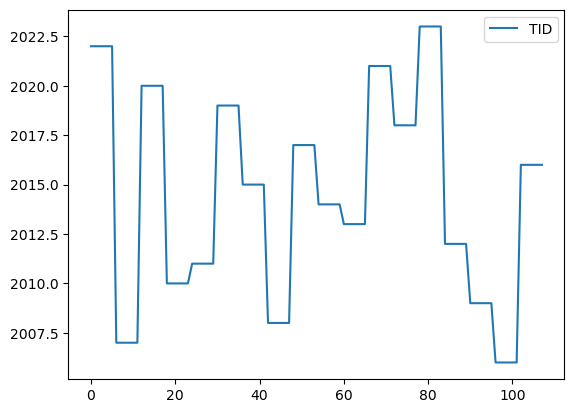

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ind_sorted.plot(ax=ax)

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

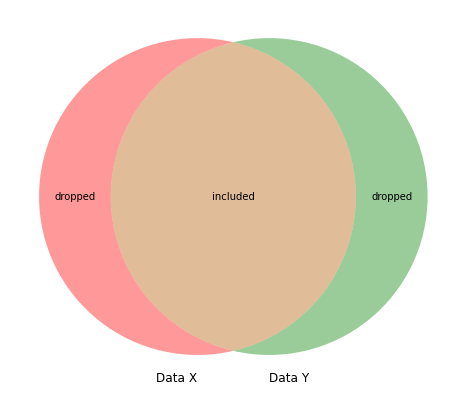

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.